In [1]:
#Import all the modules

import urllib
import json
import requests
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil
import sys
from nilearn import image as nli
from nilearn import plotting as nlp
from neurosynth.base.dataset import Dataset
from neurosynth import meta, decode, network

%matplotlib inline
import pickle


import sys
sys.path.append("../../")

import clint
sample_nifti_path = '../data/Talairach-labels-2mm.nii.gz'
sample_nifti = nli.load_img(sample_nifti_path)


/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/miniconda3/envs/dylan/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/miniconda3/envs

#  Load data from EMR

In [ ]:
# Put Clint emr load funcitons here
sv_directory=“/home/ubuntu/zehai/data/synpuf/”
json_directory=“/home/ubuntu/zehai/data/AchillesExport/”
[condition_occur,conditionera_map,observation,ob_map,conditionera_map]=defread_EMR(csv_directory,json_directory)

Unfortunately this is super slow, so we'll just load some pickles for you

In [2]:
with open('../docs/example_data/symptom_table.pkz', 'rb') as f:
    symptoms = pickle.load(f)


In [3]:
symptoms

,person_id,diagnosis_id,diagnosis,symptom_id,neurosynth_key,CONCEPT_PATH,symptom_name
0,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,42872402,[native],NA||NA||NA||NA||Coronary arteriosclerosis in n...,Coronary arteriosclerosis in native artery
1,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,443597,"[disease, stage]",NA||NA||NA||NA||Chronic kidney disease stage 3,Chronic kidney disease stage 3
2,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,376208,[tissue],NA||NA||NA||NA||Disorder of soft tissue,Disorder of soft tissue
3,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,4168222,[mass],NA||NA||NA||NA||Intra-abdominal and pelvic swe...,"Intra-abdominal and pelvic swelling, mass and ..."
4,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,4162993,"[limb, skin]",NA||NA||NA||NA||Malignant neoplasm of skin of ...,Malignant neoplasm of skin of lower limb
5,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,376977,[field],NA||NA||NA||NA||Heteronymous bilateral visual ...,Heteronymous bilateral visual field defects
6,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,434465,[lesion],NA||NA||NA||NA||Nonallopathic lesion of rib cage,Nonallopathic lesion of rib cage
7,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,433453,[behavior],NA||NA||NA||NA||Motor function behavior finding,Motor function behavior finding
8,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,442077,[disorder],NA||NA||NA||NA||Anxiety disorder,Anxiety disorder
9,1928,137519,thyrotoxicosis from ectopic thyroid nodule wit...,443629,[tend],NA||NA||NA||NA||Generalized abdominal tenderness,Generalized abdominal tenderness


# Symptom to structure pipeline

File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in 

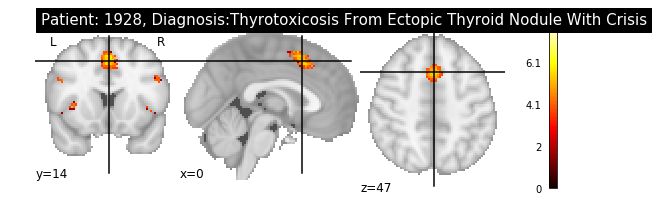

In [4]:
clint.plot_subject(symptoms, 1928, sample_nifti)

File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped


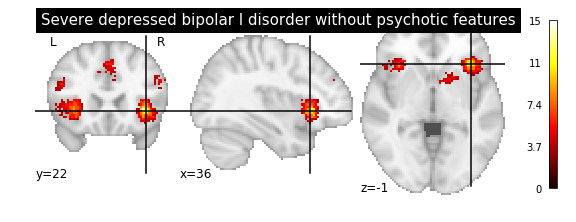

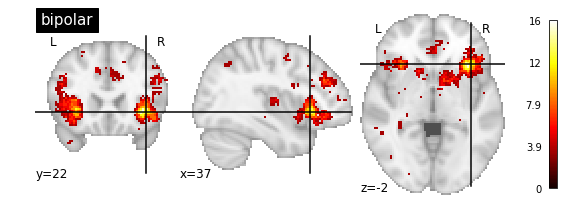

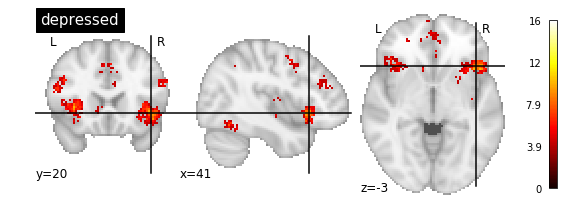

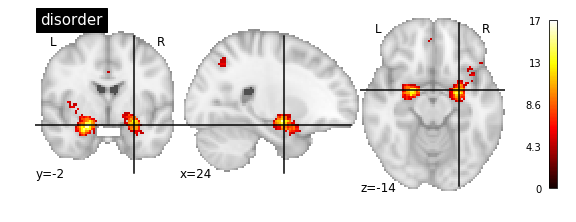

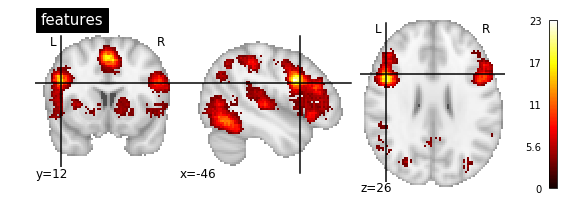

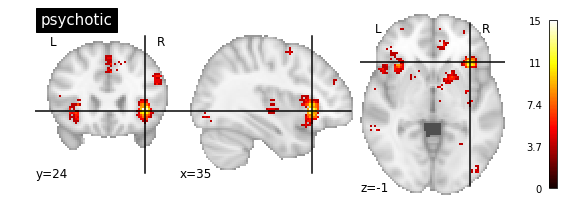

In [5]:
clint.plot_symptom(symptoms.iloc[17,:], sample_nifti)

File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped
File in cache, download skipped


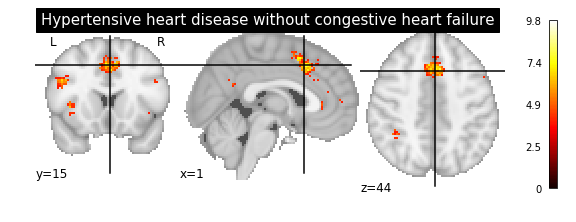

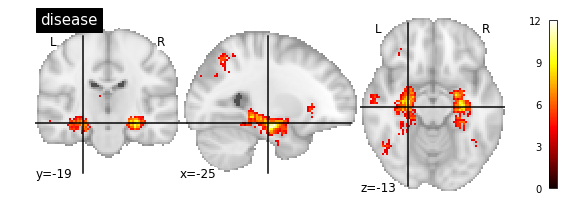

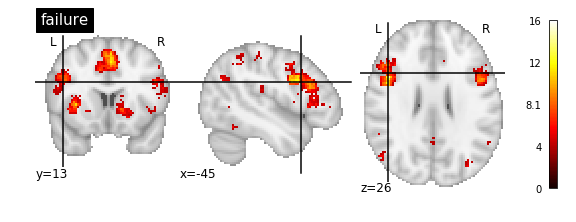

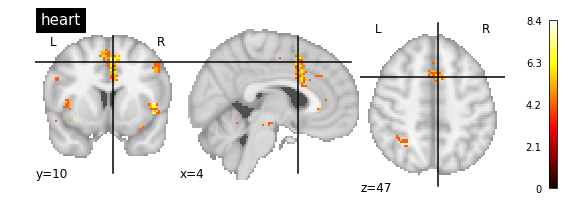

In [6]:
clint.plot_symptom(symptoms.iloc[44252,:], sample_nifti)

# Structure to symptom pipeline is still in progress pending neurosynth

In [17]:
import os
os.mkdir()

In [8]:
def get_label_map():
    levels = ['region', 'hemisphere_region', 'lobe', 'gyrus', 'tissue', 'sub-label']
    label_map = {}
    for level in levels:
        with open ('../data/%s_label_map.pkz'%level, 'rb') as h:
            label_map.update(pickle.load( h))
    return label_map

In [9]:
label_map = get_label_map()

In [10]:
sample_nifti_path = '../data/Talairach-labels-2mm.nii.gz'
sample_nifti = nli.load_img(sample_nifti_path)

In [11]:
region_nii = nli.new_img_like(sample_nifti, label_map['Frontal Lobe'], sample_nifti.affine, copy_header=True)

In [12]:
region_nii.to_filename('../data/tmp/decode_test.nii.gz')

In [27]:
# Load our local neurosynth database
ns_data_path = '/home/ubuntu/data/NeuroSynth/'
dataset = Dataset.load(ns_data_path + 'dataset.pkl')

In [26]:
dataset.create_image_table()

KeyboardInterrupt: 

array([ 9065511,  9084599,  9114263, ..., 26110429, 26124712, 26124716])

In [18]:

dc = decode.Decoder(dataset)

KeyboardInterrupt: 

In [17]:
dc.decode()

TypeError: plot_polar() missing 1 required positional argument: 'data'